# Clasificador de imágenes de deportes

## Librerías necesarias

In [37]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, DepthwiseConv2D, Dropout, BatchNormalization, Rescaling
from tensorflow.keras import regularizers
from tensorflow.keras.utils import image_dataset_from_directory

## Formación de datos con labels

In [36]:
csv_data = pd.read_csv('sports.csv')

train = csv_data[csv_data['data set'] == 'train']
test = csv_data[csv_data['data set'] == 'test']
valid = csv_data[csv_data['data set'] == 'valid']

train = pd.concat((train['filepaths'], train['class id']), axis=1)
test = pd.concat((test['filepaths'], test['class id']), axis=1)
valid = pd.concat((valid['filepaths'], valid['class id']), axis=1)

train.rename(columns={'filepaths': 'filepath', 'class id': 'class_id'}, inplace=True)
test.rename(columns={'filepaths': 'filepath', 'class id': 'class_id'}, inplace=True)
valid.rename(columns={'filepaths': 'filepath', 'class id': 'class_id'}, inplace=True)

print(valid.head())


                     filepath  class_id
13992  valid/air hockey/1.jpg         0
13993  valid/air hockey/2.jpg         0
13994  valid/air hockey/3.jpg         0
13995  valid/air hockey/4.jpg         0
13996  valid/air hockey/5.jpg         0


## Preparación de datos

### Aumento de datos

In [38]:

# Create the images and labels arrays
# Xtrain = np.array([get_image(filepath) for filepath in train['filepath']])
ytrain = np.array(train['class_id'].astype(int))

# Xtest = np.array([get_image(filepath) for filepath in test['filepath']])
ytest = np.array(test['class_id'].astype(int))

# Xvalid = np.array([get_image(filepath) for filepath in valid['filepath']])
yvalid = np.array(valid['class_id'].astype(int))

data_augmentation = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
])


Xtrain = image_dataset_from_directory('train', labels=list(ytrain), label_mode='int', image_size=(224, 224), batch_size=40, shuffle=True)
Xtest = image_dataset_from_directory('test', labels=list(ytest), label_mode='int', image_size=(224, 224), batch_size=40)
Xvalid = image_dataset_from_directory('valid', labels=list(yvalid), label_mode='int', image_size=(224, 224), batch_size=40)


Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


## Creación del modelo

### Parámetros

In [5]:
IMG_SIZE = (224, 224, 3)


### Modelo 1

In [ ]:

# Define the model architecture 1
model = Sequential([
    data_augmentation,
    Rescaling(1.0 / 255.0),
    Conv2D(64, (3, 3), activation='relu', input_shape=IMG_SIZE, padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l= 0.01)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(100, activation='softmax'),
])


# Compile the model
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(x=Xtrain, epochs=50, validation_data=Xvalid,
          shuffle=False, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(Xtest)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
model.save('sports_6.h5')


Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_23 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_40 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_146 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_146 (MaxPooli  (None, 112, 112, 32)     0         
 ng2D)                                                           
                                                                 
 batch_normalization_141 (Ba  (None, 112, 112, 32)     128       
 tchNormalization)                                               
                                                                 
 dropout_134 (Dropout)       (None, 112, 112, 32)    

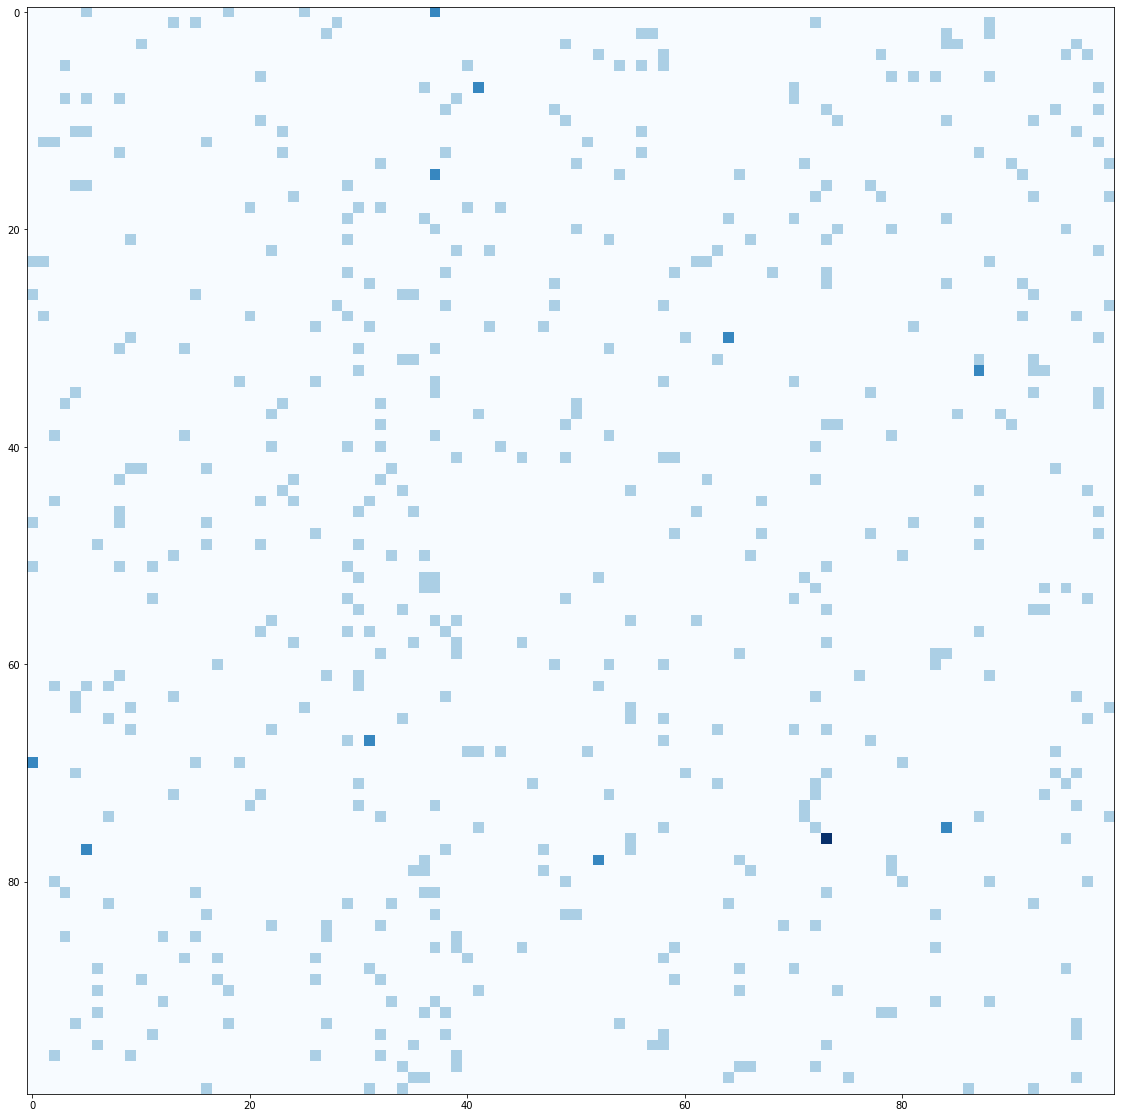

In [46]:
model5 = keras.models.load_model('sports_5.h5')
model5.summary()

test_loss, test_acc = model5.evaluate(Xtest)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
